HW4  complete 3/3

array([[ 0. ,  0.2,  0. , ...,  0. ,  0. ,  0. ],
       [-0.2,  0. ,  0.2, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.2,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.2,  0. ,  0.2],
       [ 0. ,  0. ,  0. , ...,  0. , -0.2,  0. ]])

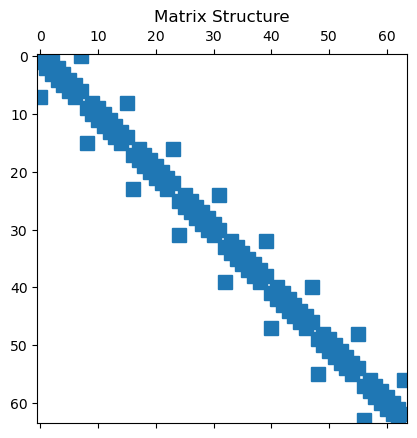

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

N = 9
x = np.linspace(-10,10,N)   #N = 9 which coorelates to 8 m becuase she wraps  will remove the last value
xspan = x[:-1]
yspan = x[:-1]
dx = xspan[1]-xspan[0]
dy = yspan[1]-yspan[0]
deltaSqr = dx**2

m = N-1  # N value in x and y directions
n = m * m  # total size of matrix

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Creating A
diagonalsA = [e1.flatten(), e1.flatten(), e5.flatten(), e2.flatten(), -4 * e1.flatten(), e3.flatten(), e4.flatten(), e1.flatten(), e1.flatten()]
offsetsA = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]
matA = spdiags(diagonalsA, offsetsA, n, n) * (1/deltaSqr)
A1 = matA.toarray()
#Creating B
diagonalsB = [e1.flatten(), -1*e1.flatten(),  e1.flatten(), -1*e1.flatten()]
offsetsB = [-(n-m),-m,m,(n-m)]
matB = spdiags(diagonalsB, offsetsB, n, n) * (1/(2*dx))
A2 = matB.toarray()
#Creating C
diagonalsC = [e5.flatten(), -1* e2.flatten(), e3.flatten(),-1*e4.flatten()]
offsetsC = [-m+1, -1, 1, m-1]
matC = spdiags(diagonalsC, offsetsC, n, n) * (1/(2*dy))
A3 = matC.toarray()

# Plot matrix structure
display(A3)
plt.figure(5)
plt.spy(matC)
plt.title('Matrix Structure')
plt.show()

#########################HW5##########################


